In [12]:
import sys
from pathlib import Path

PROJECT_ROOT = Path.cwd().parent
sys.path.append(str(PROJECT_ROOT))

In [13]:
from evaluator.tester import Tester, train_ds, val_ds, test_ds

In [14]:
# Bag of words for generating features
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression

documents = [item.summary for item in train_ds]
vectorizer = CountVectorizer(max_features=1000, stop_words="english")
model = LinearRegression()

x_train = vectorizer.fit_transform(documents)
y_train = np.array([float(item.price) for item in train_ds])
model.fit(x_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [15]:
from models.item import Item


def count_vect_based_lin_regression(item: Item) -> float:
    summary = item.summary
    x = vectorizer.transform([summary])
    y = (model.predict(x))[0]
    return max(0, float(y))

1: Guess: $0.00 Truth: $35.00 Error: $35.00 SLE: 12.84 Item: Small Soar Dove Bird Necklace, Delicate ...
2: Guess: $37.49 Truth: $25.00 Error: $12.49 SLE: 0.15 Item: Omaha Steaks Gift Card
3: Guess: $7.47 Truth: $285.00 Error: $277.53 SLE: 12.39 Item: Ohana Baritone Ukulele Model BK-20CE
4: Guess: $100.54 Truth: $4.88 Error: $95.66 SLE: 8.12 Item: BodyGuardz - Pure 2 Edge Glass Screen Pr...
5: Guess: $25.39 Truth: $5.00 Error: $20.39 SLE: 2.19 Item: Numer 1 Dad Iron On Decal, Father's Day ...
6: Guess: $40.61 Truth: $16.99 Error: $23.62 SLE: 0.70 Item: I Love My Maltese Rhinestone Iron on Tra...
7: Guess: $157.32 Truth: $84.99 Error: $72.33 SLE: 0.37 Item: JJ Electronics Amplifier Tubes (T-EL84-J...
8: Guess: $8.43 Truth: $18.99 Error: $10.56 SLE: 0.56 Item: Women’s Satin Kimono Robe for Bridesmaid...
9: Guess: $94.33 Truth: $22.08 Error: $72.25 SLE: 2.01 Item: Monoprice PLA Plus+ Premium 3D Filament ...
10: Guess: $48.97 Truth: $39.98 Error: $8.99 SLE: 0.04 Item: LOVEVOOK Laptop Backp

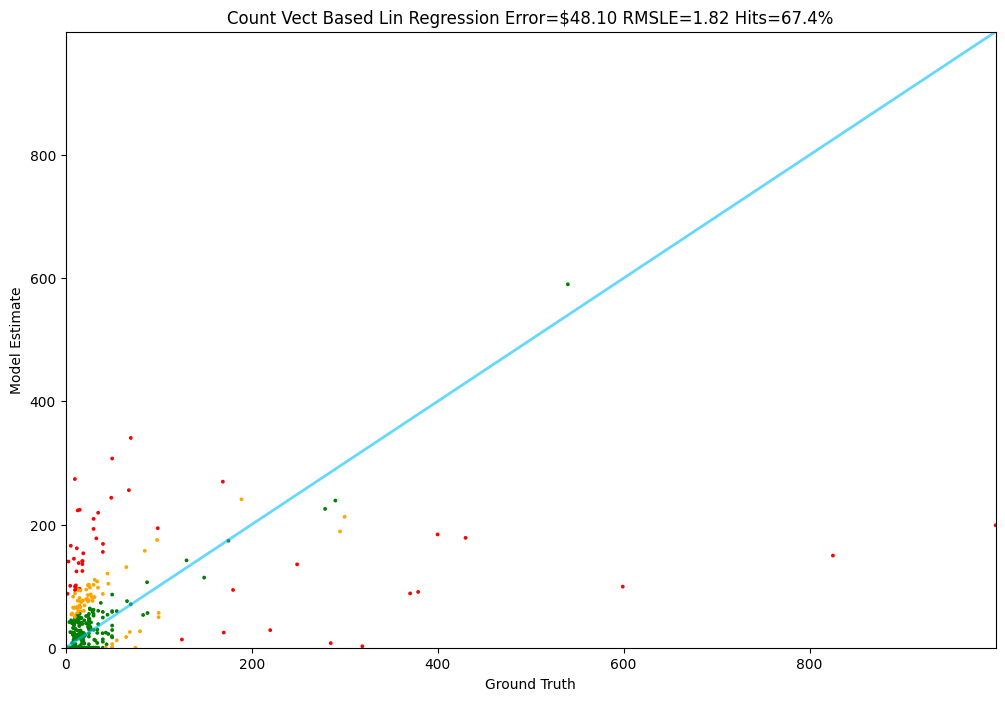

In [16]:
Tester.test(count_vect_based_lin_regression)